<a href="https://colab.research.google.com/github/PosgradoMNA/actividades-del-projecto-equipo175-rva-a01378921-rrm-a01793108/blob/main/ActividadSemanal4_A01793108-A01378921.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Nombre: Jhonathan Ricardo Robayo Martínez

Matrícula: A01793108

Materia: Ciencia y Analítica de Datos

Profesor: Jobish Vallikavungal

Asesor: Juan Miguel Meza

Fecha: 2022-10-02

# 0.0 Carga data

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler 
from sklearn.decomposition import PCA
import matplotlib as mpl
import matplotlib.pyplot as plt

In [ ]:
path = "https://raw.githubusercontent.com/PosgradoMNA/Actividades_Aprendizaje-/main/default%20of%20credit%20card%20clients.csv"

data = pd.read_csv(path, sep= ",", index_col = 0)
data.index.name = None
data = data.rename(columns = {
    'X1': 'MontoCredito',      'X2': 'Genero', 'X3' : 'NivelEducacion',
    'X4': 'EstadoCivil',       'X5': 'Edad',   'X6' : 'HistorialPagoSep',
    'X7': 'HistorialPagoAgo',  'X8': 'HistorialPagoJul', 'X9' : 'HistorialPagoJun',
    'X10': 'HistorialPagoMay', 'X11': 'HistorialPagoAbr', 'X12' : 'EstadoCuentaSep',
    'X13': 'EstadoCuentaAgo',  'X14': 'EstadoCuentaJul', 'X15' : 'EstadoCuentaJun',
    'X16': 'EstadoCuentaMay',  'X17': 'EstadoCuentaAbr', 'X18' : 'MontoPagoAnteriorSep',
    'X19': 'MontoPagoAnteriorAgo', 'X20': 'MontoPagoAnteriorJul', 
    'X21': 'MontoPagoAnteriorJun', 'X22': 'MontoPagoAnteriorMay', 
    'X23': 'MontoPagoAnteriorAbr'})
### eliminacion da observaciones con vacios en varias columnas
### llenarlos con la media ocacionaria que sean en absoluto irreales
data.dropna(axis = 0, inplace = True)
modaEstadoCivil = data['EstadoCivil'].mode()[0]
data['EstadoCivil'] = data['EstadoCivil'].map({0:modaEstadoCivil, 1:1, 2:2, 3:3}) 
data['NivelEducacion'] = data['NivelEducacion'].map({0:4, 1:1, 2:2, 3:3, 4:4, 5:4, 6:4}) 
display(data.describe(include = 'all'))

,MontoCredito,Genero,NivelEducacion,EstadoCivil,Edad,HistorialPagoSep,HistorialPagoAgo,HistorialPagoJul,HistorialPagoJun,HistorialPagoMay,...,EstadoCuentaJun,EstadoCuentaMay,EstadoCuentaAbr,MontoPagoAnteriorSep,MontoPagoAnteriorAgo,MontoPagoAnteriorJul,MontoPagoAnteriorJun,MontoPagoAnteriorMay,MontoPagoAnteriorAbr,Y
count,29958.000000,29958.000000,29958.000000,29958.000000,29958.000000,29958.000000,29958.000000,29958.000000,29958.000000,29958.000000,...,29958.000000,29958.000000,29958.000000,29958.000000,2.995800e+04,29958.000000,29958.000000,29958.000000,29958.000000,29958.000000
mean,167555.900928,1.604012,1.842212,1.555344,35.483443,-0.017124,-0.134021,-0.166767,-0.221110,-0.266807,...,43279.335370,40328.984578,38889.925763,5664.614460,5.925715e+03,5228.429969,4829.873556,4801.481574,5220.708025,0.221143
std,129737.299088,0.489070,0.744557,0.518115,9.214319,1.123989,1.197171,1.196026,1.168419,1.132307,...,64364.684347,60826.219326,59582.883301,16568.823518,2.305598e+04,17617.338167,15676.205514,15285.552652,17788.983767,0.415023
min,10000.000000,1.000000,1.000000,1.000000,21.000000,-2.000000,-2.000000,-2.000000,-2.000000,-2.000000,...,-170000.000000,-81334.000000,-339603.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000
25%,50000.000000,1.000000,1.000000,1.000000,28.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,...,2327.500000,1762.250000,1256.000000,1000.000000,8.352500e+02,390.000000,296.250000,253.250000,118.000000,0.000000
50%,140000.000000,2.000000,2.000000,2.000000,34.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,19037.500000,18104.500000,17067.500000,2100.000000,2.009000e+03,1800.000000,1500.000000,1500.000000,1500.000000,0.000000
75%,240000.000000,2.000000,2.000000,2.000000,41.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,54551.250000,50220.750000,49234.750000,5007.000000,5.000000e+03,4511.500000,4014.750000,4040.000000,4000.000000,0.000000
max,1000000.000000,2.000000,4.000000,3.000000,79.000000,8.000000,8.000000,8.000000,8.000000,8.000000,...,891586.000000,927171.000000,961664.000000,873552.000000,1.684259e+06,896040.000000,621000.000000,426529.000000,528666.000000,1.000000


In [ ]:
## separacion de informacion
  ## retiramos la variable objetivo y las categoricas
  ## dado que ACP solo es aplicable a variables numericas
data_X = data.drop(['Y', 'Genero', 'NivelEducacion','EstadoCivil'], axis = 1)
data_Y = data['Y']

# 1. Parte 1: Ejercicio guiado

**Paso 1:** Determine el número mínimo de componentes principales que representan la mayor parte de la variación en sus datos

* Utilice la proporción acumulada de la varianza que explican los componentes para determinar la cantidad de varianza que explican los componentes principales.

**Paso 2:** Interprete cada componente principal en términos de las variables originales

* Examine la magnitud y la dirección de los coeficientes de las variables originales.
Nota: Cuanto mayor sea el valor absoluto del coeficiente, más importante será la variable correspondiente en el cálculo del componente.

**Paso 3:** Identifique valores atípicos

* Realice alguna gráfica de valores atípicos o boxplot para identificar los valores atípicos. Cualquier punto que esté más alejado de la línea de referencia es un valor atípico.

## Desarrollo

In [ ]:
print('varianza correspondiente para variables:')
print(data_X.var())
print('\ntotal de varianza:')
print(sum(data_X.var()))
print('\nProporcion de varianza explicada por las variables')
print(np.round(data_X.var()/sum(data_X.var()),4)*100)

varianza correspondiente para variables:
MontoCredito            1.683177e+10
Edad                    8.490367e+01
HistorialPagoSep        1.263351e+00
HistorialPagoAgo        1.433218e+00
HistorialPagoJul        1.430478e+00
HistorialPagoJun        1.365202e+00
HistorialPagoMay        1.282118e+00
HistorialPagoAbr        1.320896e+00
EstadoCuentaSep         5.427998e+09
EstadoCuentaAgo         5.071040e+09
EstadoCuentaJul         4.814312e+09
EstadoCuentaJun         4.142813e+09
EstadoCuentaMay         3.699829e+09
EstadoCuentaAbr         3.550120e+09
MontoPagoAnteriorSep    2.745259e+08
MontoPagoAnteriorAgo    5.315784e+08
MontoPagoAnteriorJul    3.103706e+08
MontoPagoAnteriorJun    2.457434e+08
MontoPagoAnteriorMay    2.336481e+08
MontoPagoAnteriorAbr    3.164479e+08
dtype: float64

total de varianza:
45450192701.38587

Proporcion de varianza explicada por las variables
MontoCredito            37.03
Edad                     0.00
HistorialPagoSep         0.00
HistorialPagoAgo        

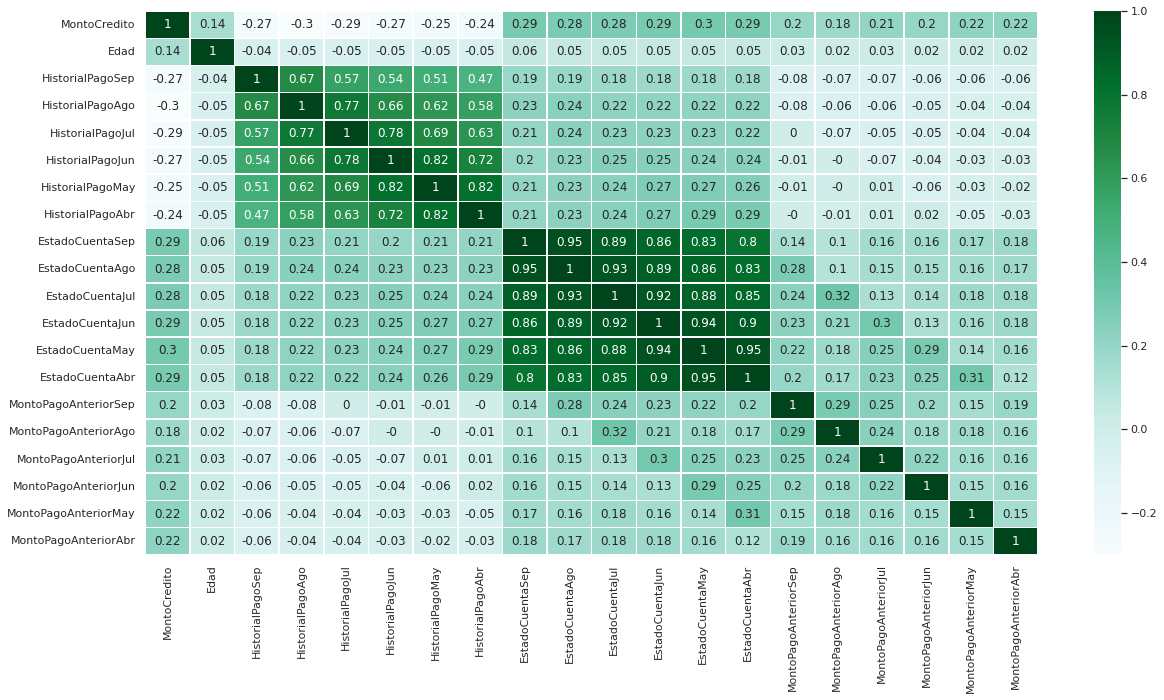

In [ ]:
sns.set(rc={'figure.figsize':(20,10)})
sns.heatmap(data_X.corr(method='pearson').round(2), annot = True, linewidths=.5, cmap = 'BuGn')

In [ ]:
scaler = MinMaxScaler().fit(data_X)
data_XScaler = scaler.fit_transform(data_X)
data_XScaler.shape

(29958, 20)

In [ ]:
pcs = PCA(n_components = 20)
pcs.fit(data_XScaler)

pcsSummary = pd.DataFrame({'Standard deviation': np.sqrt(pcs.explained_variance_),
                          'Proportion of variance': pcs.explained_variance_ratio_,
                          'Cumulative proportion': np.cumsum(pcs.explained_variance_ratio_)#column 
                          }
                          )
pcsSummary

,Standard deviation,Proportion of variance,Cumulative proportion
0,0.249104,0.422036,0.422036
1,0.164825,0.184772,0.606808
2,0.145197,0.143386,0.750195
3,0.097183,0.064234,0.814429
4,0.090936,0.056242,0.870670
5,0.073860,0.037103,0.907773
6,0.060238,0.024679,0.932453
7,0.051874,0.018302,0.950754
8,0.042550,0.012314,0.963068
9,0.036701,0.009161,0.972229


### **Paso 1:** Determine el número mínimo de componentes principales que representan la mayor parte de la variación en sus datos

* Utilice la proporción acumulada de la varianza que explican los componentes para determinar la cantidad de varianza que explican los componentes principales.

**Respuesta:**

Para mantener el 91% de la variabilidad de los datos analizados es necesario tomar los cinco primeros componentes, luego de esto el incremento de variabilidad por un componente más, es igual o menor al 2%. Por lo que, podríamos quedarnos con esta variabilidad sacrificando tan solo el 9% de la información disponible.

In [ ]:
pcsSummary = pcsSummary.transpose()
pcsSummary.round(2)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19
Standard deviation,0.25,0.16,0.15,0.10,0.09,0.07,0.06,0.05,0.04,0.04,0.03,0.03,0.02,0.02,0.02,0.02,0.01,0.01,0.01,0.01
Proportion of variance,0.42,0.18,0.14,0.06,0.06,0.04,0.02,0.02,0.01,0.01,0.01,0.01,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
Cumulative proportion,0.42,0.61,0.75,0.81,0.87,0.91,0.93,0.95,0.96,0.97,0.98,0.99,0.99,0.99,1.00,1.00,1.00,1.00,1.00,1.00


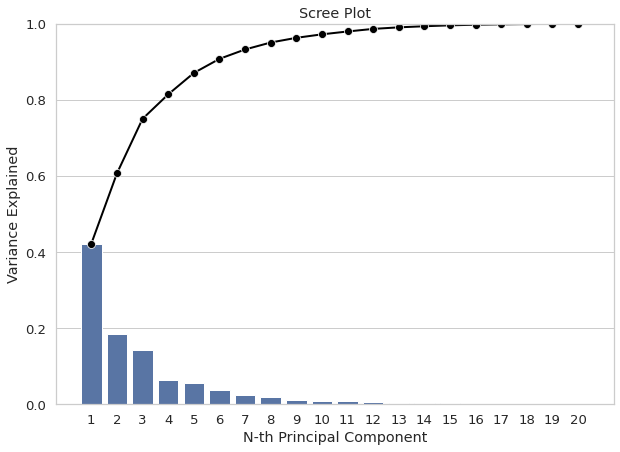

In [ ]:
PC_components = np.arange(pcs.n_components_) + 1
#PC_components

_ = sns.set(style = 'whitegrid', 
            font_scale = 1.2
            )

fig, ax = plt.subplots(figsize=(10, 7))

_ = sns.barplot(x = PC_components, 
                y = pcs.explained_variance_ratio_, 
                color = 'b'
                )

_ = sns.lineplot(x = PC_components-1, 
                 y = np.cumsum(pcs.explained_variance_ratio_), 
                 color = 'black', 
                 linestyle = '-', 
                 linewidth = 2, 
                 marker = 'o', 
                 markersize = 8
                 )

plt.title('Scree Plot')
plt.xlabel('N-th Principal Component')
plt.ylabel('Variance Explained')
plt.ylim(0, 1)
plt.show()

-*************fin paso 1****************************************************-


### **Paso 2:** Interprete cada componente principal en términos de las variables originales

* Examine la magnitud y la dirección de los coeficientes de las variables originales.
Nota: Cuanto mayor sea el valor absoluto del coeficiente, más importante será la variable correspondiente en el cálculo del componente.

**Respuesta**

La magnitud de los valores propios nos indica cuan importante es cada una de las variables para cada componente. En es dirrección estas son los 5 variables más importantes en los 5 componentes que contienen en conjunto el 91% de la información.

PC1:

HistorialPagoJul    0.421600

HistorialPagoJun    0.416537

HistorialPagoAgo    0.407655

HistorialPagoMay    0.396385

HistorialPagoAbr    0.380328

PC2:

Edad               0.809858

MontoCredito       0.405848

EstadoCuentaAgo    0.199373

EstadoCuentaSep    0.190353

EstadoCuentaJun    0.180637

PC3:

MontoCredito       0.530537

EstadoCuentaAgo    0.291769

EstadoCuentaSep    0.277765

EstadoCuentaJun    0.266263

EstadoCuentaMay    0.263004

PC4:

HistorialPagoAbr        0.426682

HistorialPagoMay        0.398052

MontoCredito            0.301183

HistorialPagoJun        0.274002

MontoPagoAnteriorAgo    0.008230


In [ ]:
# Construcción de elementos de componente principal
pcsComponents_df = pd.DataFrame(pcs.components_.transpose(), 
                                columns=['PC1', 'PC2', 'PC3', 'PC4', 'PC5', 'PC6', 'PC7', 'PC8', 'PC9', 'PC10'
                                         , 'PC11', 'PC12', 'PC13', 'PC14', 'PC15', 'PC16', 'PC17', 'PC18', 'PC19', 'PC20'],
                                index=data_X.columns
                                )
pcsComponents_df.round(3 )

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,PC11,PC12,PC13,PC14,PC15,PC16,PC17,PC18,PC19,PC20
MontoCredito,-0.199,0.406,0.531,0.301,-0.644,-0.035,0.026,-0.005,0.004,-0.072,-0.017,-0.025,-0.011,-0.008,-0.007,-0.003,-0.004,0.004,-0.001,-0.001
Edad,-0.069,0.810,-0.580,-0.010,0.048,0.003,0.002,-0.000,-0.003,0.005,0.000,0.003,0.000,-0.000,-0.000,-0.000,-0.000,-0.000,-0.000,0.000
HistorialPagoSep,0.327,0.007,-0.053,-0.494,-0.352,-0.642,-0.293,-0.152,-0.029,0.029,0.006,0.011,0.004,0.010,0.001,0.004,-0.000,-0.000,-0.001,-0.000
HistorialPagoAgo,0.408,0.018,-0.039,-0.337,-0.297,0.252,0.586,0.455,0.111,0.001,-0.030,0.023,-0.012,0.031,-0.020,-0.010,-0.004,-0.002,0.000,-0.003
HistorialPagoJul,0.422,0.023,-0.029,-0.035,-0.189,0.563,-0.122,-0.621,-0.256,0.005,-0.007,0.009,0.001,-0.030,0.014,0.026,0.009,-0.004,-0.001,0.005
HistorialPagoJun,0.417,0.035,-0.012,0.274,-0.019,0.172,-0.568,0.318,0.541,-0.002,-0.011,0.005,-0.009,0.014,0.037,-0.030,0.003,0.004,0.005,-0.002
HistorialPagoMay,0.396,0.040,0.012,0.398,0.099,-0.185,-0.056,0.354,-0.709,-0.007,0.008,-0.003,0.082,-0.020,-0.034,0.009,0.000,0.003,-0.006,-0.001
HistorialPagoAbr,0.380,0.045,0.023,0.427,0.175,-0.372,0.473,-0.390,0.339,-0.012,0.065,-0.060,-0.050,0.018,0.010,0.007,-0.009,-0.003,0.003,0.000
EstadoCuentaSep,0.074,0.190,0.278,-0.206,0.239,0.032,-0.014,0.032,0.005,-0.174,0.360,-0.320,0.231,-0.205,0.366,0.086,0.312,-0.421,-0.053,-0.057
EstadoCuentaAgo,0.082,0.199,0.292,-0.204,0.263,0.047,-0.039,-0.007,-0.009,-0.163,0.282,-0.232,0.109,0.266,-0.229,-0.269,-0.222,0.496,0.102,0.284


In [ ]:
# Identificando  la variable más importante del primer comoponente principal (PC1)
pcsComponents_df.PC1.abs().idxmax()

'HistorialPagoJul'

In [ ]:
# Imprimimos los componentes más importantes de cada componente principal
print(pcsComponents_df.PC1.abs().nlargest())
print(pcsComponents_df.PC2.abs().nlargest())
print(pcsComponents_df.PC3.abs().nlargest())
print(pcsComponents_df.PC4.abs().nlargest())
print(pcsComponents_df.PC5.abs().nlargest())

HistorialPagoJul    0.421600
HistorialPagoJun    0.416537
HistorialPagoAgo    0.407655
HistorialPagoMay    0.396385
HistorialPagoAbr    0.380328
Name: PC1, dtype: float64
Edad               0.809858
MontoCredito       0.405848
EstadoCuentaAgo    0.199373
EstadoCuentaSep    0.190353
EstadoCuentaJun    0.180637
Name: PC2, dtype: float64
Edad               0.580381
MontoCredito       0.530537
EstadoCuentaAgo    0.291769
EstadoCuentaSep    0.277765
EstadoCuentaJun    0.266263
Name: PC3, dtype: float64
HistorialPagoSep    0.493709
HistorialPagoAbr    0.426682
HistorialPagoMay    0.398052
HistorialPagoAgo    0.336542
MontoCredito        0.301183
Name: PC4, dtype: float64
MontoCredito        0.644335
HistorialPagoSep    0.351782
HistorialPagoAgo    0.297301
EstadoCuentaAgo     0.262858
EstadoCuentaJun     0.242970
Name: PC5, dtype: float64


-*************fin paso 2****************************************************-

### **Paso 3:** Identifique valores atípicos

* Realice alguna gráfica de valores atípicos o boxplot para identificar los valores atípicos. Cualquier punto que esté más alejado de la línea de referencia es un valor atípico.

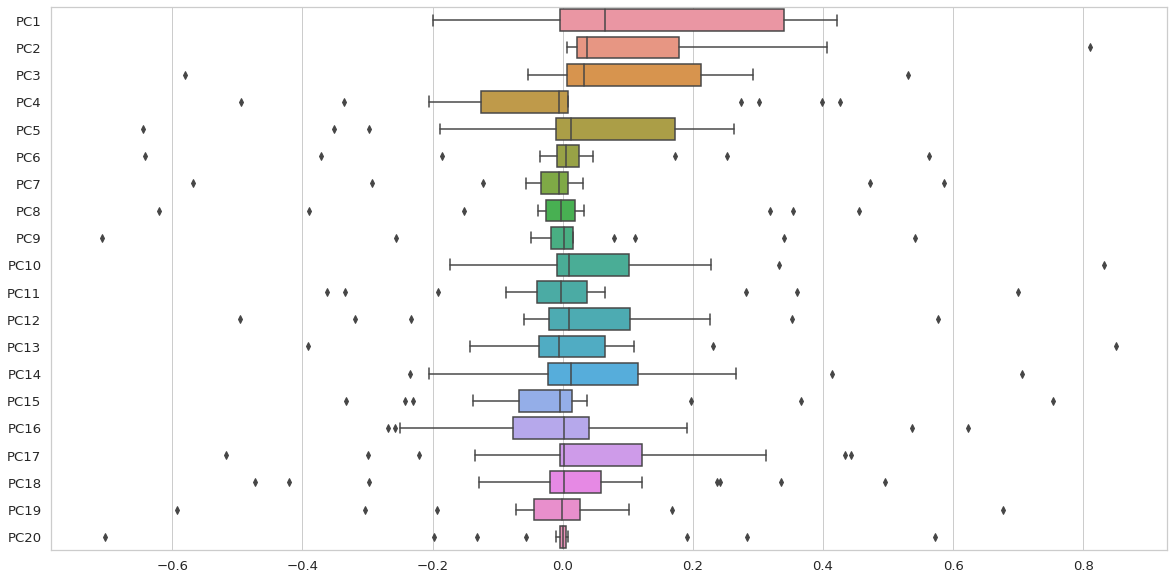

In [ ]:
# Distribución de los componentes de PCA
sns.boxplot(data = pcsComponents_df, orient="h")
plt.show()

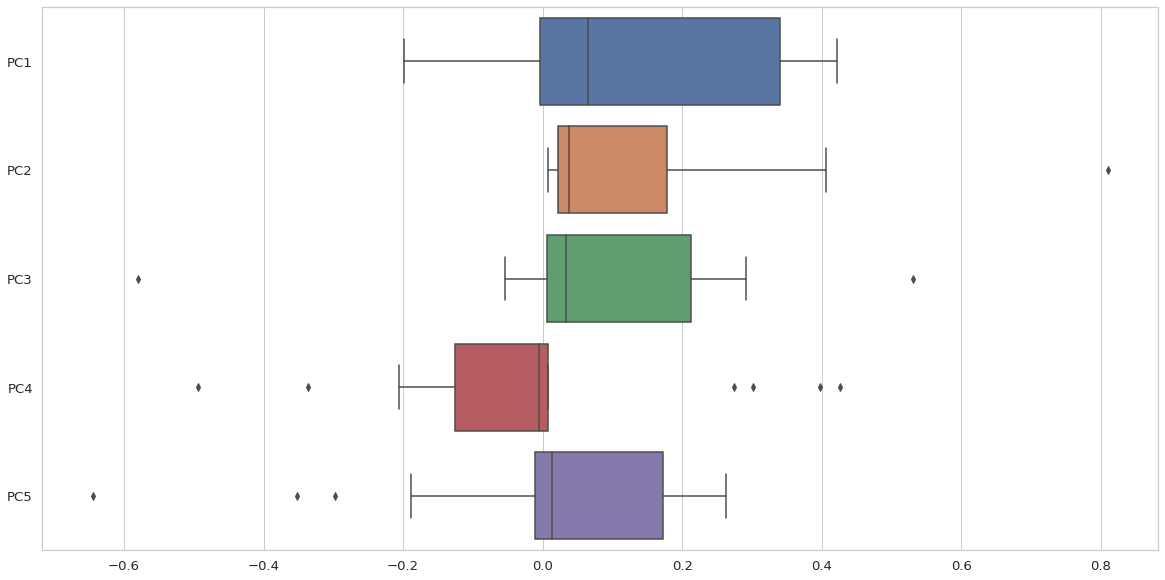

In [14]:
# Distribución de los componentes de PCA (5 principales)
sns.boxplot(data = pcsComponents_df.loc[:,'PC1':'PC5'], orient="h")
plt.show()

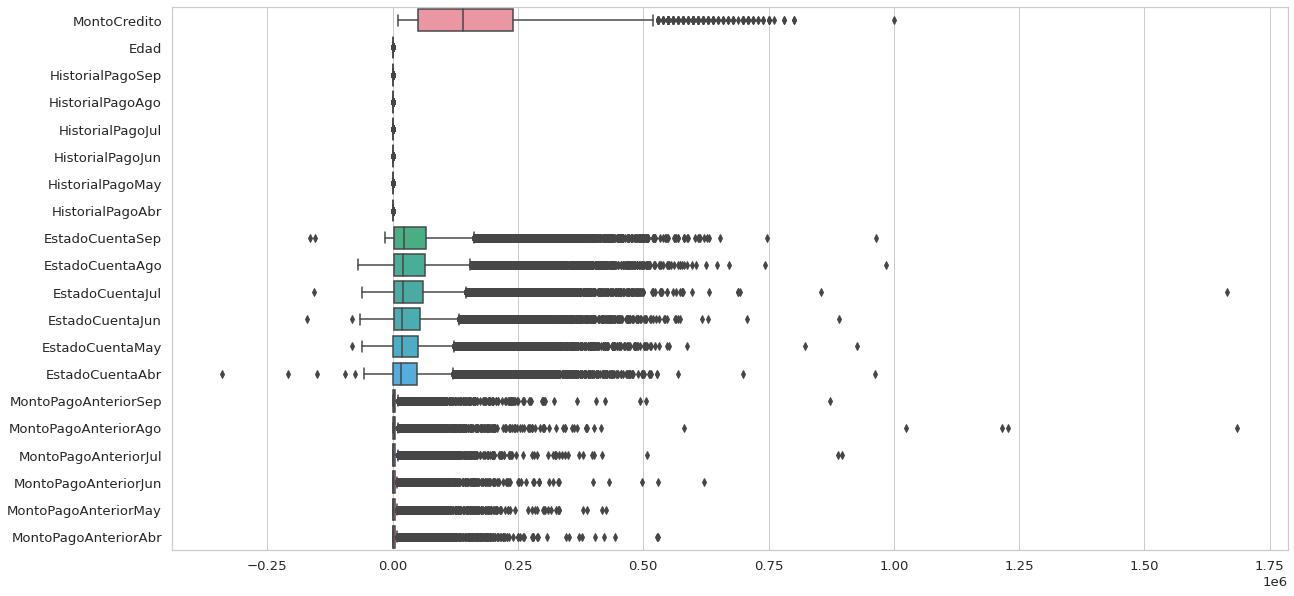

In [24]:
# Distribución de los datos antes de PCA (normalizados)
sns.boxplot(data = pd.DataFrame(data_X), orient="h")
plt.show()

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:444: UserWarning: X has feature names, but PCA was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"


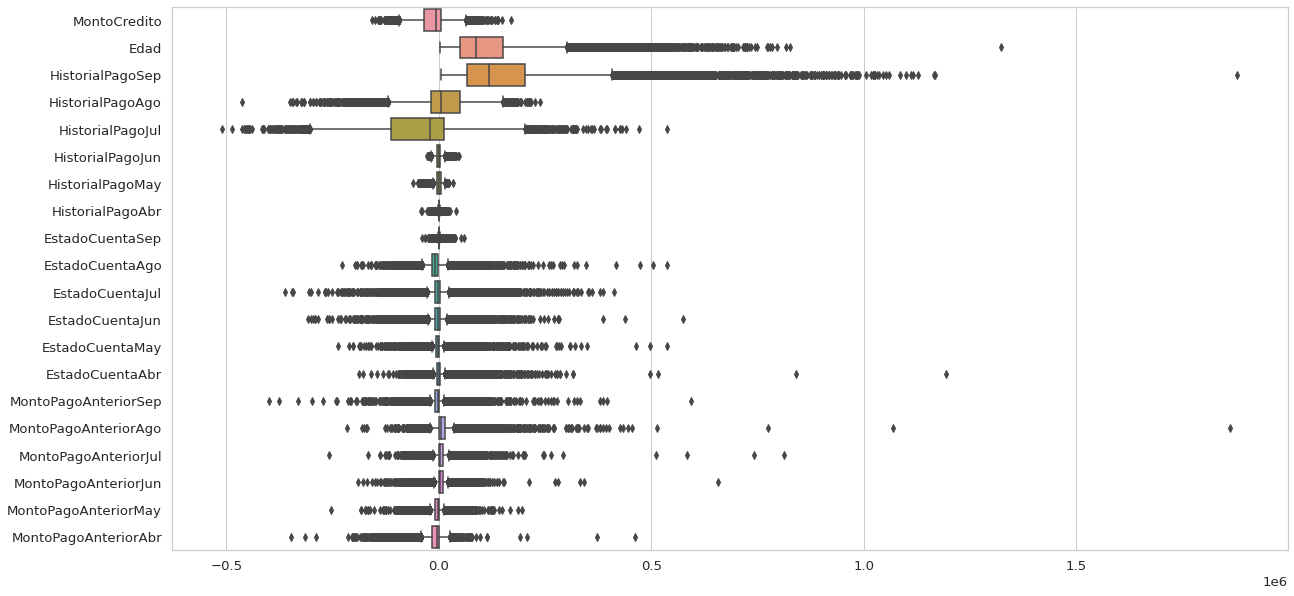

In [23]:
# Distribución de los datos DESPUÉS de PCA (normalizados)
sns.boxplot(data = pd.DataFrame(pcs.transform(data_X),columns = data_X.columns), orient="h")
plt.show()